In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras.layers as kl
from keras.models import Model
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# The RNN model implementation 

In [3]:
#loading the Training Data
X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")

In [4]:
Y_train = Y_train.reshape((Y_train.shape[0], 1))
print(X_train.shape)
print(Y_train.shape)

(38001, 714, 32)
(38001, 1)


In [9]:
#loading the Evaluation Data
X_eval = np.load("X_eval.npy")
Y_eval = np.load("Y_eval.npy")

In [10]:
Y_eval = Y_eval.reshape((Y_eval.shape[0], 1))
print(X_eval.shape)
print(Y_eval.shape)

(4750, 714, 32)
(4750, 1)


## Creating a simple RNN model

In [ ]:
#creating simple RNN model
def create_simple_rnn(input_shape=(714, 32)):
    
    inputs = kl.Input(input_shape)
    rnn = kl.SimpleRNN(units=128, activation="relu", return_sequences=False)(inputs)
    outputs =kl.Dense(units=1, activation="sigmoid")(rnn)

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [15]:
simple_rnn = create_simple_rnn()
simple_rnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 714, 32)]         0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               20608     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 20,737
Trainable params: 20,737
Non-trainable params: 0
_________________________________________________________________


In [16]:
simple_rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [17]:
#training the model 
history = simple_rnn.fit(X_train[:100], Y_train[:100], epochs=100, batch_size=32, validation_data=(X_eval[:10], Y_eval[:10]))

Epoch 1/100
4/4 [==============================] - 2s 206ms/step - loss: 0.7352 - accuracy: 0.4300 - val_loss: 0.6467 - val_accuracy: 0.8000
Epoch 2/100
4/4 [==============================] - 1s 134ms/step - loss: 0.7240 - accuracy: 0.4600 - val_loss: 0.8011 - val_accuracy: 0.1000
Epoch 3/100
4/4 [==============================] - 1s 139ms/step - loss: 0.7026 - accuracy: 0.5000 - val_loss: 0.6668 - val_accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 1s 134ms/step - loss: 0.7077 - accuracy: 0.4800 - val_loss: 0.7713 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 1s 148ms/step - loss: 0.6876 - accuracy: 0.5500 - val_loss: 0.8357 - val_accuracy: 0.2000
Epoch 6/100
4/4 [==============================] - 1s 130ms/step - loss: 0.6992 - accuracy: 0.5000 - val_loss: 0.7300 - val_accuracy: 0.4000
Epoch 7/100
4/4 [==============================] - 1s 131ms/step - loss: 0.7048 - accuracy: 0.4700 - val_loss: 0.6777 - val_accuracy: 0.7000
Epoch 8/100
4

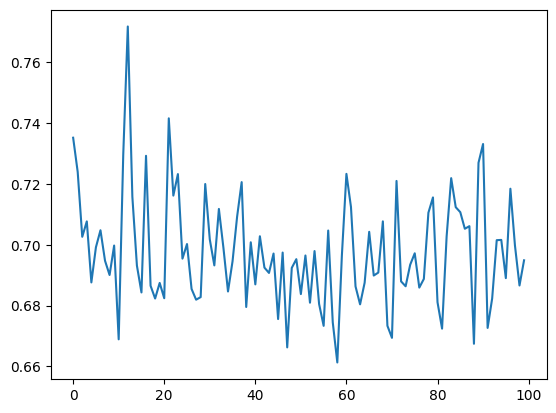

In [18]:
plt.plot(history.history['loss'])
plt.show()